In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df_pr = pd.read_csv("pr_reviews_IEducar.csv")

In [7]:
df_pr.columns = [
  "author_login",
  "author_association",
  "body",
  "submitted_at",
  "includes_created_edit",
  "state"
]


In [8]:
df_pr

,author_login,author_association,body,submitted_at,includes_created_edit,state
0,edersoares,MEMBER,NaN,2024-06-24T20:31:06Z,False,APPROVED
1,edersoares,MEMBER,NaN,2024-06-24T14:22:30Z,False,APPROVED
2,edersoares,MEMBER,NaN,2024-06-20T18:46:06Z,False,APPROVED
3,edersoares,MEMBER,NaN,2024-06-18T17:06:50Z,False,APPROVED
4,edersoares,MEMBER,Obrigado pela contribuição @lucassch,2024-04-19T18:24:30Z,False,APPROVED
...,...,...,...,...,...,...
502,farribeiro,CONTRIBUTOR,Requisito review,2018-06-07T23:45:02Z,False,COMMENTED
503,MarceloCajueiro,CONTRIBUTOR,NaN,2018-06-09T15:31:24Z,False,APPROVED
504,farribeiro,CONTRIBUTOR,Pode aplicar o Merge tranquilamente,2018-06-06T19:23:58Z,False,APPROVED
505,nawarian,NONE,NaN,2018-06-07T11:14:42Z,False,APPROVED


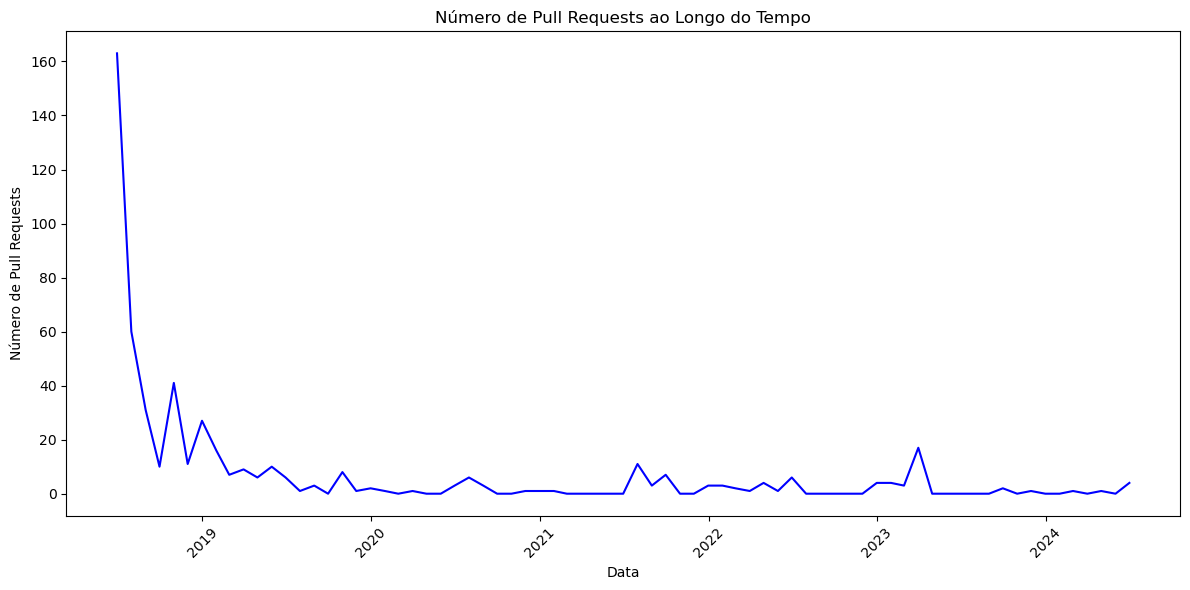

In [5]:
# Converter a coluna de data para datetime
df_pr['submitted_at'] = pd.to_datetime(df_pr['submitted_at'], errors='coerce')

# Remover linhas onde a conversão falhou (se houver)
df_pr = df_pr.dropna(subset=['submitted_at'])

# Definir a coluna de data como índice
df_pr.set_index('submitted_at', inplace=True)

# Agrupar por mês e contar o número de pull requests
monthly_pull_requests = df_pr.resample('M').size()

# Plotar o gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_pull_requests.index, y=monthly_pull_requests.values, marker='', color='blue')
plt.title('Número de Pull Requests ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Número de Pull Requests')
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()


In [9]:
contagem_nomes_df = df_pr['author_login'].value_counts().reset_index()
contagem_nomes_df.columns = ['author_login', 'frequencia']
print(contagem_nomes_df)


        author_login  frequencia
0         edersoares         154
1         farribeiro          70
2        eberfreitas          59
3       munizeverton          54
4    MarceloCajueiro          41
5          msoares94          30
6   williamespindola          24
7        vitormattos          16
8              Bonot          13
9       rodrigogbgod           9
10            tembra           7
11    MatheusNicoski           7
12       fernandosjp           5
13          nawarian           4
14          jrbarros           4
15         vinicelms           2
16      tiagocamargo           2
17     leandrofinger           1
18           geekcom           1
19             jashk           1
20     victorhsanjos           1
21       gilcimartec           1
22          lucassch           1


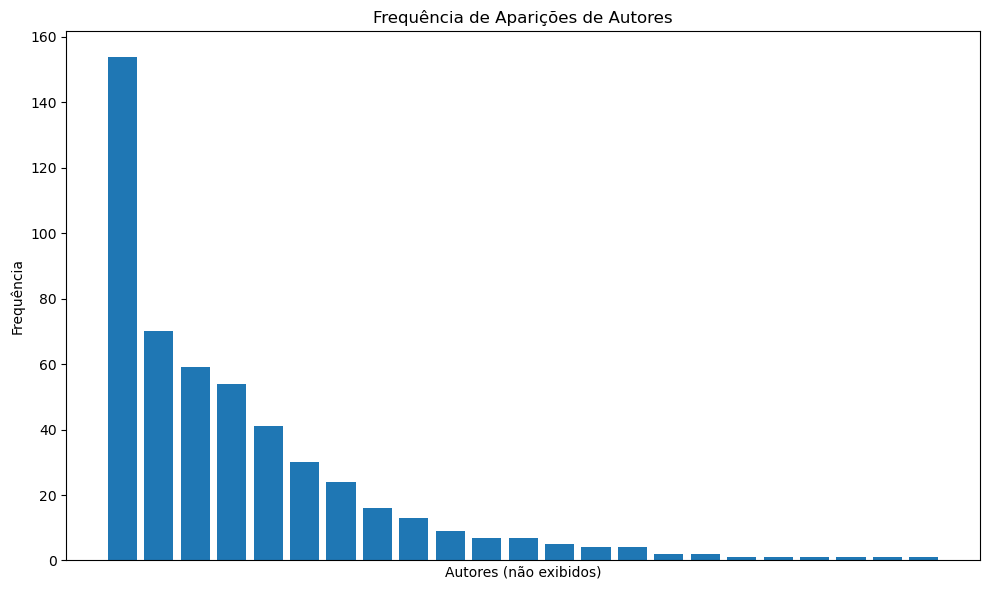

In [10]:
# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(contagem_nomes_df['author_login'], contagem_nomes_df['frequencia'])

# Adicionar rótulos e título
plt.xlabel('Autores (não exibidos)')
plt.ylabel('Frequência')
plt.title('Frequência de Aparições de Autores')

# Remover os nomes do eixo X
plt.xticks([])

# Exibir o gráfico
plt.tight_layout()
plt.show()


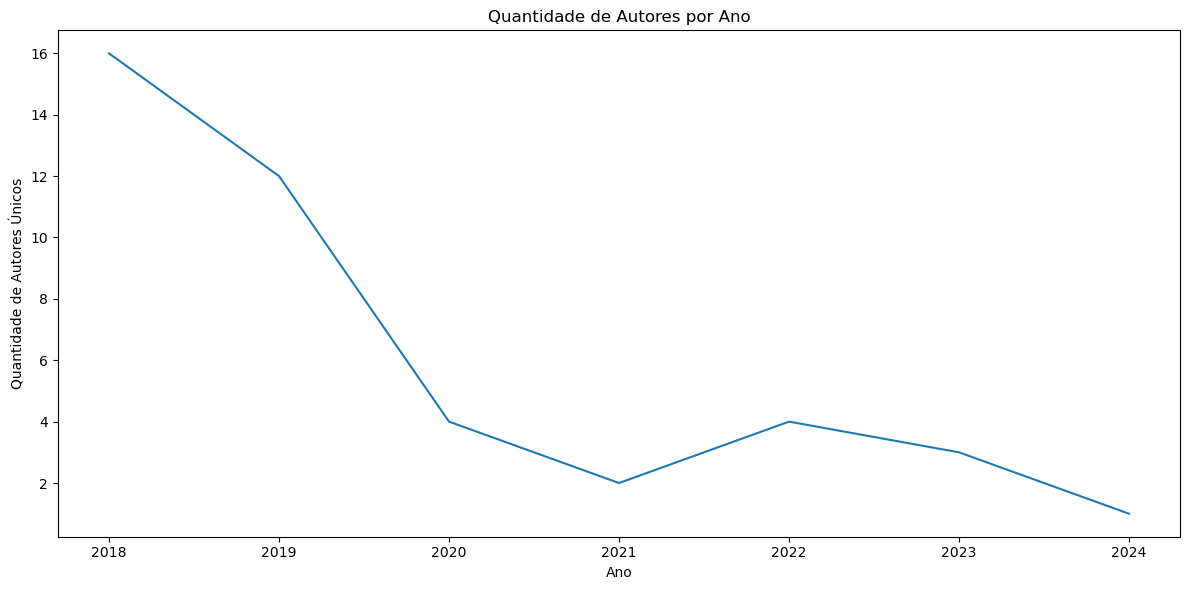

In [11]:
# Converter a coluna 'submitted_at' para datetime
df_pr['submitted_at'] = pd.to_datetime(df_pr['submitted_at'])

# Extrair o ano da coluna 'submitted_at'
df_pr['year'] = df_pr['submitted_at'].dt.year

# Contar o número de autores únicos por ano
authors_per_year = df_pr.groupby('year')['author_login'].nunique()

# Plotar o gráfico de linhas
plt.figure(figsize=(12, 6))
plt.plot(authors_per_year.index, authors_per_year.values, marker='', linestyle='-')
plt.title('Quantidade de Autores por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Autores Únicos')
plt.xticks(authors_per_year.index)  # Para garantir que todos os anos sejam mostrados
plt.grid(False)
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [12]:
contagem_nomes_df = df_pr['author_association'].value_counts().reset_index()
contagem_nomes_df.columns = ['author_association', 'frequencia']
print(contagem_nomes_df)


  author_association  frequencia
0        CONTRIBUTOR         343
1             MEMBER         156
2               NONE           8


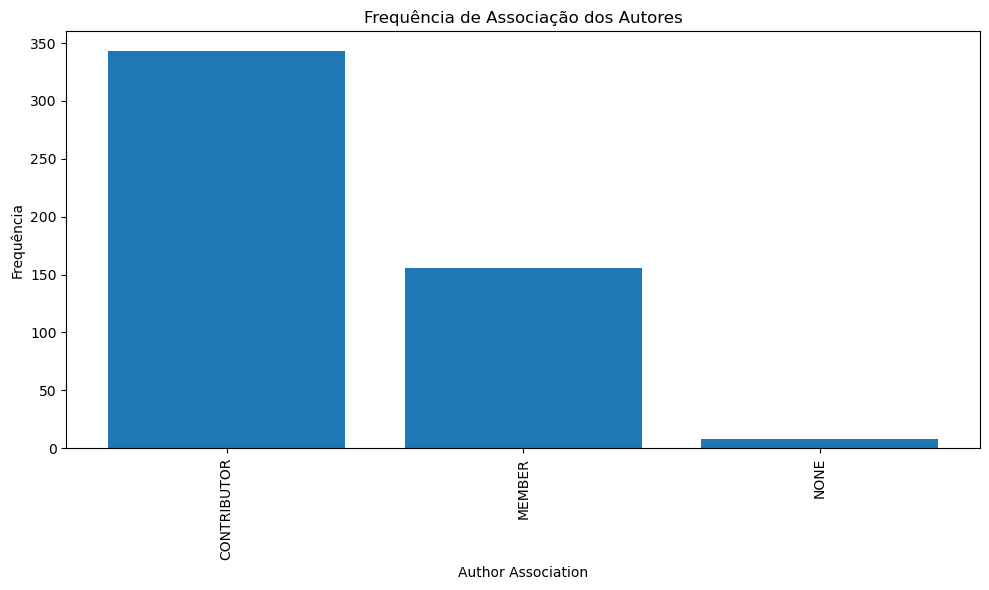

In [13]:
# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(contagem_nomes_df['author_association'], contagem_nomes_df['frequencia'])

# Adicionar rótulos
plt.xlabel('Author Association')
plt.ylabel('Frequência')
plt.title('Frequência de Associação dos Autores')
plt.xticks(rotation=90)  # Rotacionar os nomes no eixo x para melhor visualização

# Exibir o gráfico
plt.tight_layout()
plt.show()

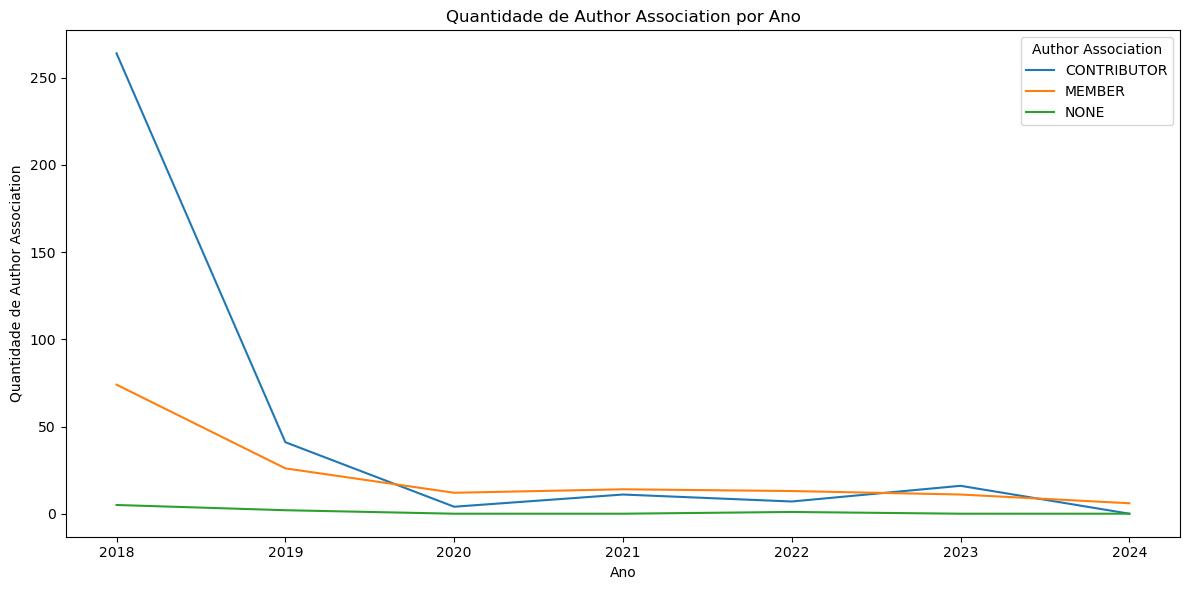

In [14]:
# Converter a coluna 'submitted_at' para datetime
df_pr['submitted_at'] = pd.to_datetime(df_pr['submitted_at'])

# Extrair o ano da coluna 'submitted_at'
df_pr['year'] = df_pr['submitted_at'].dt.year

# Contar a quantidade de author_association únicos por ano
association_counts = df_pr.groupby(['year', 'author_association']).size().unstack(fill_value=0)

# Plotar o gráfico de linhas
plt.figure(figsize=(12, 6))

for association in association_counts.columns:
    plt.plot(association_counts.index, association_counts[association], marker='', linestyle='-', label=association)

plt.title('Quantidade de Author Association por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Author Association')
plt.xticks(association_counts.index)  # Para garantir que todos os anos sejam mostrados
plt.grid(False)
plt.legend(title='Author Association')
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [15]:
contagem_nomes_df = df_pr['state'].value_counts().reset_index()
contagem_nomes_df.columns = ['state', 'frequencia']
print(contagem_nomes_df)


               state  frequencia
0          COMMENTED         238
1           APPROVED         207
2  CHANGES_REQUESTED          62


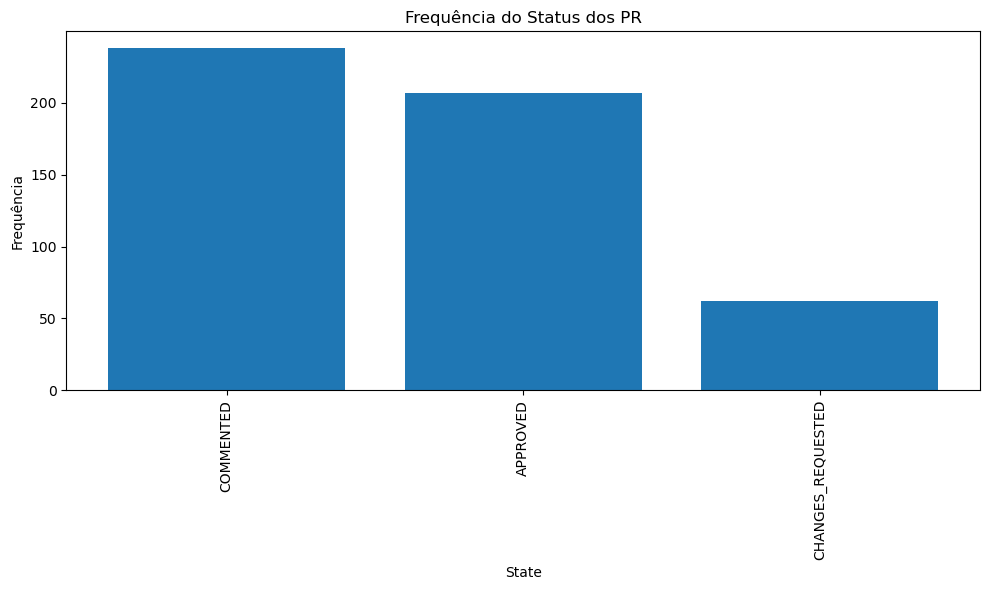

In [16]:
# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(contagem_nomes_df['state'], contagem_nomes_df['frequencia'])

# Adicionar rótulos
plt.xlabel('State')
plt.ylabel('Frequência')
plt.title('Frequência do Status dos PR')
plt.xticks(rotation=90)  # Rotacionar os nomes no eixo x para melhor visualização

# Exibir o gráfico
plt.tight_layout()
plt.show()


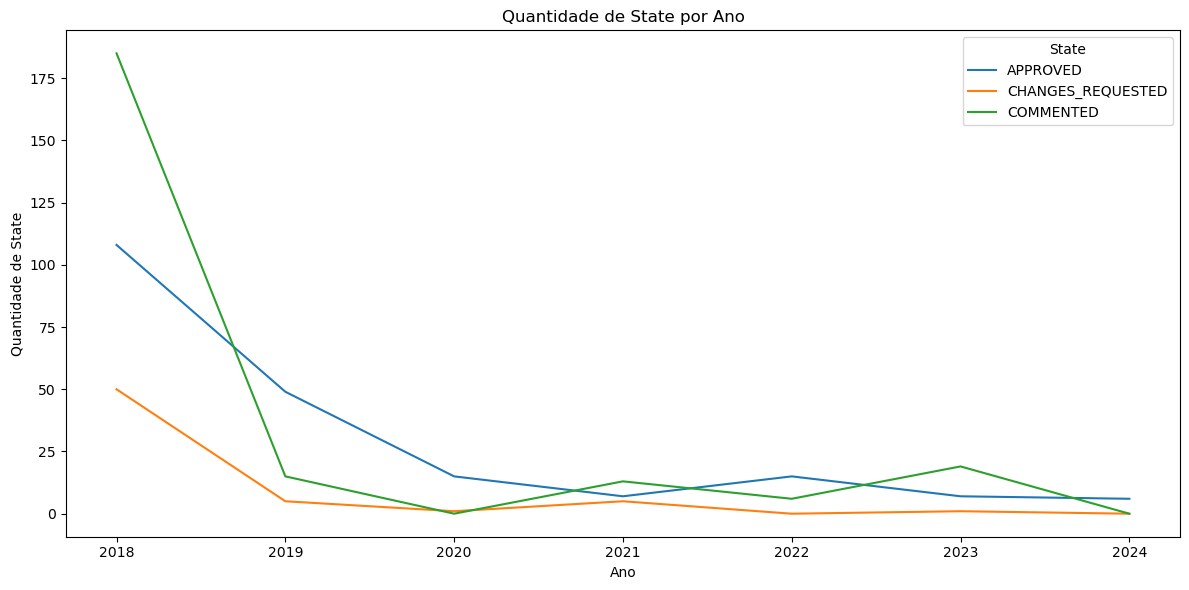

In [17]:
# Converter a coluna 'submitted_at' para datetime
df_pr['submitted_at'] = pd.to_datetime(df_pr['submitted_at'])

# Extrair o ano da coluna 'submitted_at'
df_pr['year'] = df_pr['submitted_at'].dt.year

# Contar a quantidade de states por ano
state_counts = df_pr.groupby(['year', 'state']).size().unstack(fill_value=0)

# Plotar o gráfico de linhas
plt.figure(figsize=(12, 6))

for state in state_counts.columns:
    plt.plot(state_counts.index, state_counts[state], marker='', linestyle='-', label=state)

plt.title('Quantidade de State por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de State')
plt.xticks(state_counts.index)  # Para garantir que todos os anos sejam mostrados
plt.grid(False)  
plt.legend(title='State')
plt.tight_layout()

# Exibir o gráfico
plt.show()